In [309]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [310]:
df = pd.read_csv('EDA1.csv')
df.drop(columns = ['Day'], axis = 1, inplace = True)
well_5 = df[df['Well Name'] == 5]
well_5.drop(columns = ['Well Name'], axis = 1, inplace = True)
well_5.reset_index(inplace = True, drop = True)
well_5 = pd.Series(data = well_5['Oil Volume'])
well_5 = well_5[well_5 > 0]
well_5.reset_index(inplace = True, drop = True)

C:\Users\csmid\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


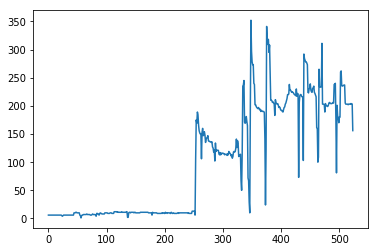

In [311]:
plt.plot(well_5)

Dropping data that is before production kicks in

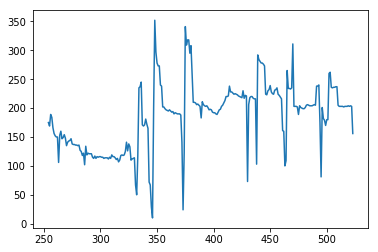

In [312]:
plt.plot(well_5[254:])

In [313]:
well_5_drop = well_5[254:]
well_5_drop.reset_index(inplace = True, drop = True)

Text(0,0.5,'Production (BBL)')

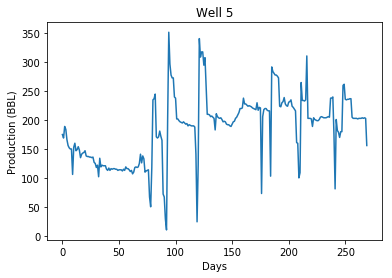

In [314]:
plt.plot(well_5_drop)
plt.title('Well 5')
plt.xlabel('Days')
plt.ylabel('Production (BBL)')

In [315]:
from numpy import percentile
outliers_index = []
outliers_value = []
multiplier = .9
def outlier_finder(data, timesteps, multiplier):
    outliers_index = []
    outliers_value = []
    for i in range(0, len(data), timesteps):
        q25 = percentile(data[i:i+timesteps], 25)
        q75 = percentile(data[i:i+timesteps], 75)
        iqr = q75 - q25
        cut_off = iqr * multiplier
        lower, upper = q25 - cut_off, q75 + cut_off
        outliers = [x for x in data[i:i+timesteps] if x < lower or x > upper]
        outliers_value.extend(outliers)
        for idx, val in enumerate(data[i:i+timesteps]):
            if val in outliers:
                outliers_index.append(idx + i)
    index = outliers_index
    value = outliers_value
    return index, value

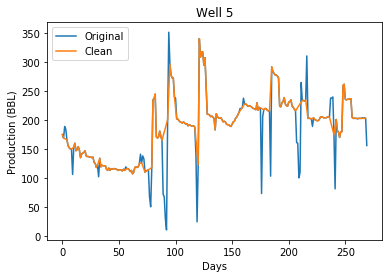

In [327]:
index, values = outlier_finder(well_5_drop, 20, multiplier)
well_5_clean = well_5_drop.drop(index = index)
plt.plot(well_5_drop)
plt.plot(well_5_clean)
plt.title('Well 5')
plt.xlabel('Days')
plt.ylabel('Production (BBL)')
plt.legend(['Original', 'Clean'])

70    126.0
71    138.0
72    133.0
73    110.0
74    112.0
75    113.0
76    114.0
77     67.0
78     50.0
79    118.0
Name: Oil Volume, dtype: float64

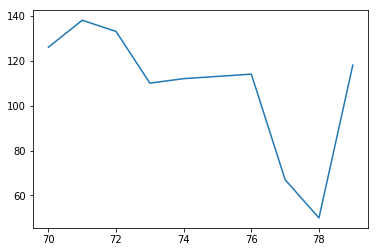

In [317]:
plt.plot(well_5_drop[70:80])
well_5_drop[70:80]

outliers: index 77 and 78 

85    171.0
86    181.0
87    172.0
88    165.0
89     72.0
90     67.0
91     29.0
92     10.0
93    201.0
94    352.0
95    297.0
96    278.0
97    273.0
98    273.0
99    240.0
Name: Oil Volume, dtype: float64

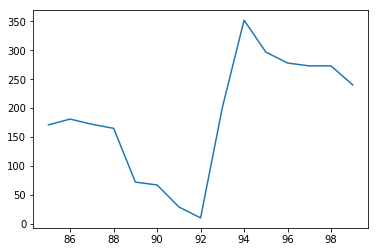

In [318]:
plt.plot(well_5_drop[85:100])
well_5_drop[85:100]

Outliers: index 91 and 92

115    190.0
116    190.0
117    188.0
118    141.0
119     24.0
120    123.0
121    341.0
122    309.0
Name: Oil Volume, dtype: float64

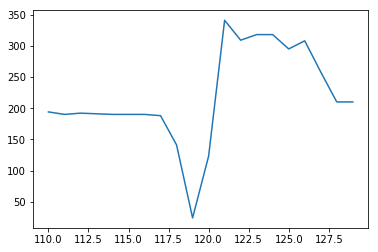

In [319]:
plt.plot(well_5_drop[110:130])
well_5_drop[115:123]

Outliers: index 119

170    219.0
171    218.0
172    230.0
173    217.0
174    222.0
175    221.0
176     73.0
177    206.0
178    218.0
179    220.0
180    220.0
181    217.0
182    216.0
183    216.0
184    103.0
185    292.0
186    284.0
187    281.0
188    278.0
189    278.0
Name: Oil Volume, dtype: float64

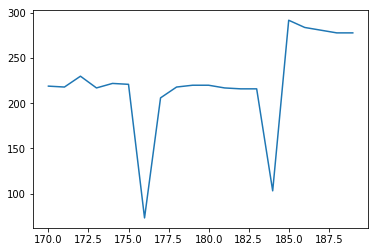

In [320]:
plt.plot(well_5_drop[170:190])
well_5_drop[170:190]

Outliers: index 176 and 184

200    231.0
201    232.0
202    235.0
203    224.0
204    222.0
205    219.0
206    216.0
207    161.0
208    160.0
209    100.0
210    109.0
211    265.0
212    234.0
213    234.0
214    233.0
Name: Oil Volume, dtype: float64

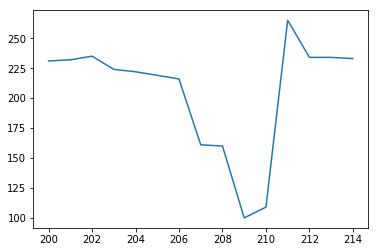

In [321]:
plt.plot(well_5_drop[200:215])
well_5_drop[200:215]

outliers: index 209 and 210

235    206.0
236    205.0
237    238.0
238    238.0
239    240.0
240    175.0
241     81.0
242    201.0
243    182.0
244    179.0
Name: Oil Volume, dtype: float64

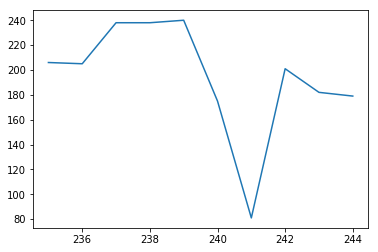

In [322]:
plt.plot(well_5_drop[235:245])
well_5_drop[235:245]

outliers: index 241

In [323]:
outlier_indicies = [77, 78, 91, 92, 119, 176, 184, 209, 210, 241]
for i in range(1, 40):
    outliers_detected = 0
    index_list = []
    index, value = outlier_finder(well_5_drop, i, multiplier)
    index_list.append(index)
    total_outliers = len(index)
    for a in range(len(index_list[0])):
        if index_list[0][a] in outlier_indicies:
            outliers_detected += 1
    if outliers_detected == len(outlier_indicies):
        print('With %i Timesteps, all given outliers are detected with %i total outliers'% (i, total_outliers))

With 13 Timesteps, all given outliers are detected with 43 total outliers
With 16 Timesteps, all given outliers are detected with 46 total outliers
With 20 Timesteps, all given outliers are detected with 40 total outliers
With 21 Timesteps, all given outliers are detected with 53 total outliers
With 26 Timesteps, all given outliers are detected with 49 total outliers
With 27 Timesteps, all given outliers are detected with 55 total outliers
With 28 Timesteps, all given outliers are detected with 61 total outliers
With 29 Timesteps, all given outliers are detected with 60 total outliers
With 38 Timesteps, all given outliers are detected with 53 total outliers
With 39 Timesteps, all given outliers are detected with 51 total outliers


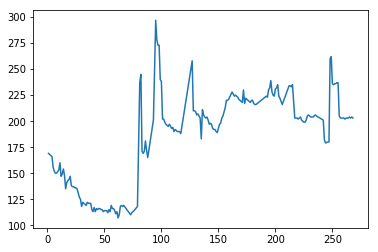

In [324]:
index, values = outlier_finder(well_5_drop, 27, multiplier)
well_5_clean = well_5_drop.drop(index = index)
plt.plot(well_5_clean)

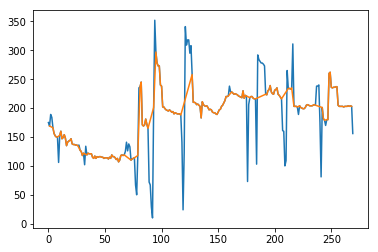

In [325]:
plt.plot(well_5_drop)
plt.plot(well_5_clean)

In [326]:
well_5_clean.reset_index(inplace = True, drop = True)
well_5_clean.to_csv(r'C:\Users\csmid\Volve Project\well_5_clean.csv', index = None, header = True)